# 빅데이터 분석 특강 (10주차) 5월9일

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연
- categories: [Special Topics in Big Data Analysis]

```python
conda env list

conda remove -n 지우고싶은이름

conda activate test
(test 환경에 들어간다.)

jupyter lab
(실행하고 들어가면 사용 가능)

conda deactivate 환경 나와

conda create -n test 
(test라는 환경을 만들어 아직 아무것도 없는 상태)

conda install -c conda-forge jupyterlab
(conda라는 앱스토어에 들어가서 주피터랩 깔아라, 그런데 conda에서 추천하는 버전으로!!)
(중간에 뭐 깔꺼냐고 y/n 선택하라고 물어보는 이유, 적절한 건 있는데 이렇게 설치 정말 할건지!, 그니까 원래 있던 버전 지우고 다른 버전깐다고 물어볼수도..)
(pip / conda intall 차이점 pip는 최신 패키지만 다운 받음 conda install는 적절한 버전을 다운 받기 가능)

conda install -c conda forge rise
(주피터 노트북으로 발효자 만들기, 슬라이드 쇼 만들 수 있게!)

주피터 노트북에서 view에서 slide show~, 슬라이드쇼 하는 중간에 수정도 가능
ㄷ
```

### imports

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.experimental.numpy as tnp

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
import graphviz
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"'+ s + ';}')

### 로지스틱 모형 (1): 활성화함수로 sigmoid 선택

`-` 기본버전은 아래와 같다 

$$y_i \approx \text{sigmoid}(b + w_1 x_{1,i} + \dots + w_{784}x_{784,i})= \frac{\exp(b + w_1 x_{1,i} + \dots + w_{784}x_{784,i})}{1+\exp(b + w_1 x_{1,i} + \dots + w_{784}x_{784,i})}$$

항상 0보다 클 것이고 분자가 분모보다 작아 1보다 작을 것이다.

`-` 벡터버전은 아래와 같다. 

$${\boldsymbol y} \approx \text{sigmoid}({\bf X}{\bf W} + b) = \frac{\exp({\bf XW} +b)}{1+\exp({\bf XW} +b)}$$ 

sigmoid는 broadcasting이 되어야 한다.

`-` 벡터버전에 익숙해지도록 하자. 벡터버전에 사용된 차원 및 연산을 정리하면 아래와 같다. 

- ${\bf X}$: (n,784) matrix 

- ${\boldsymbol y}$: (n,1) matrix

- ${\bf W}$: (784,1) matrix

- $b$: (1,1) matrix

- `+`, `exp` 는 브로드캐스팅

### 로지스틱 모형 (2): 활성화함수로 softmax 선택

다차원 확장이 편해진다.

0 또는 1로 정하는 이유, 0,1일 확률
- class 를 나타낼 때는 이름을 갖는 스트링을 0 또는 1로 치환한 거니까 1,2,3... 순서로 표현하는 건 적절하지 않다.

`-` $y_i=0 \text{ or } 1$ 대신에 $\boldsymbol{y}_i=[y_{i1},y_{i2}]= [1,0] \text { or } [0,1]$와 같이 코딩하면 어떠할까? (즉 원핫인코딩을 한다면?) 
- n by 2 matrix 가 되겠군!

`-` 활성화 함수를 취하기 전의 버전은 아래와 같이 볼 수 있다. 

$$[{\boldsymbol y}_1 ~ {\boldsymbol y}_2] \propto  [ {\bf X}{\bf W}_1  ~ {\bf X}{\bf W}_2] + [b_1 ~ b_2]= {\bf X} [{\bf W}_1 {\bf W}_2] + [b_1 ~ b_2]= {\bf X}{\bf W} + {\boldsymbol b}$$
    
여기에서 매트릭스 및 연산의 차원을 정리하면 아래와 같다. 

- ${\bf X}$: (n,784) matrix 

- ${\boldsymbol y}_1,{\boldsymbol y}_2$: (n,1) matrix

- ${\boldsymbol y}:=[{\boldsymbol y}_1~ {\boldsymbol y}_2]$: (n,2) matrix

- ${\bf W}_1$, ${\bf W}_2$: (784,1) matrix

- ${\bf W}:=[{\bf W}_1~ {\bf W}_2]$: (784,2) matrix

- $b_1,b_2$: (1,1) matrix

- $\boldsymbol{b}:= [b_1 ~b_2] $: (1,2) matrix

- `+` 는 브로드캐스팅



`-` 즉 로지스틱 모형 (1)의 형태를 겹쳐놓은 형태로 해석할 수 있음. 따라서 ${\bf X} {\bf W}_1 + b_1$와 ${\bf X} {\bf W}_2 + b_2$의 row값이 클수록 ${\boldsymbol y}_1$와 ${\boldsymbol y}_2$의 row값이 1이어야 함 

- ${\boldsymbol y}_1 \propto  {\bf X} {\bf W}_1 + b_1$ $\to$ ${\bf X} {\bf W}_1 + b_1$의 row값이 클수록 $\boldsymbol{y}_1$의 row 값이 1이라면 모형계수를 잘 추정한것 
- ${\boldsymbol y}_2 \propto  {\bf X} {\bf W}_2 + b_2$ $\to$ ${\bf X} {\bf W}_2 + b_2$의 row값이 클수록 $\boldsymbol{y}_2$의 row 값을 1이라면 모형계수를 잘 추정한것


`-` (문제) ${\bf X}{\bf W}_1 +b_1$의 값이 500, ${\bf X}{\bf W}_2 +b_2$의 값이 200 인 row가 있다고 하자. 대응하는 $\boldsymbol{y}_1, \boldsymbol{y}_2$의 row값은 얼마로 적합되어야 하는가? 

(1) $[0,0]$

(2) $[0,1]$

(3) $[1,0]$ <-- 이게 답이다!

(4) $[1,1]$

> note: 둘다 0 혹은 둘다 1로 적합할수는 없으니까 (1), (4)는 제외한다. ${\bf X}{\bf W}_1 +b_1$의 값이 ${\bf X}{\bf W}_2 +b_2$의 값보다 크므로 (3)번이 합리적임 

`-` **목표:** 위와 같은 문제의 답을 유도해주는 활성화함수를 설계하자. 즉 합리적인 $\hat{\boldsymbol{y}}_1,\hat{\boldsymbol{y}}_2$를 구해주는 활성화 함수를 설계해보자. 이를 위해서는 아래의 사항들이 충족되어야 한다. 

(1) $\hat{\boldsymbol{y}}_1$, $\hat{\boldsymbol{y}}_2$의 각 원소는 0보다 크고 1보다 작아야 한다. (확률을 의미해야 하니까)

(2) $\hat{\boldsymbol{y}}_1+\hat{\boldsymbol{y}}_2={\bf 1}$ 이어야 한다. (확률의 총합은 1이니까!)

(3) $\hat{\boldsymbol{y}}_1$와 $\hat{\boldsymbol{y}}_2$를 각각 따로해석하면 로지스틱처럼 되면 좋겠다. 

`-` 아래와 같은 활성화 함수를 도입하면 어떨까? 

$$\hat{\boldsymbol{y}}=[\hat{\boldsymbol y}_1 ~ \hat{\boldsymbol y}_2] =  \big[ \frac{\exp({\bf X}\hat{\bf W}_1+\hat{b}_1)}{\exp({\bf X}\hat{\bf W}_1+\hat{b}_1)+\exp({\bf X}\hat{\bf W}_2+\hat{b}_2)}  ~~ \frac{\exp({\bf X}\hat{\bf W}_2+\hat{b}_2)}{\exp({\bf X}\hat{\bf W}_1+\hat{b}_1)+\exp({\bf X}\hat{\bf W}_2+\hat{b}_2)}  \big]$$ 

`-` (1),(2)는 만족하는 듯 하다. (3)은 바로 이해되지는 않는다

(1) $\hat{\boldsymbol{y}}_1$, $\hat{\boldsymbol{y}}_2$의 각 원소는 0보다 크고 1보다 작아야 한다. --> OK!

(2) $\hat{\boldsymbol{y}}_1+\hat{\boldsymbol{y}}_2={\bf 1}$ 이어야 한다. --> OK!

(3) $\hat{\boldsymbol{y}}_1$와 $\hat{\boldsymbol{y}}_2$를 각각 따로해석하면 로지스틱처럼 되면 좋겠다.  --> ??? 

`-` 그런데 조금 따져보면 (3)도 만족된다는 것을 알 수 있다. (sigmoid, softmax Section 참고)

`-` 위와 같은 함수를 softmax라고 하자. 즉 아래와 같이 정의하자. 

$$
\hat{\boldsymbol y} = \text{softmax}({\bf X}\hat{\bf W} + {\boldsymbol b}) 
= \big[ \frac{\exp({\bf X}\hat{\bf W}_1+\hat{b}_1)}{\exp({\bf X}\hat{\bf W}_1+\hat{b}_1)+\exp({\bf X}\hat{\bf W}_2+\hat{b}_2)}  ~~ \frac{\exp({\bf X}\hat{\bf W}_2+\hat{b}_2)}{\exp({\bf X}\hat{\bf W}_1+\hat{b}_1)+\exp({\bf X}\hat{\bf W}_2+\hat{b}_2)}  \big]
$$

### sigmoid, softmax 

#### **softmax는 sigmoid의 확장형**

`-` 아래의 수식을 관찰하자. 
$$\frac{\exp(\beta_0+\beta_1 x_i)}{1+\exp(\beta_0+\beta_1x_i)}=\frac{\exp(\beta_0+\beta_1 x_i)}{e^0+\exp(\beta_0+\beta_1x_i)}$$

`-` 1을 $e^0$로 해석하면 모형2의 해석을 아래와 같이 모형1의 해석으로 적용할수 있다. 
- 모형2: ${\bf X}\hat{\bf W}_1 +\hat{b}_1$ 와 ${\bf X}\hat{\bf W}_2 +\hat{b}_2$ 의 크기를 비교하고 확률 결정
- 모형1: ${\bf X}\hat{\bf W} +\hat{b}$ 와 $0$의 크기를 비교하고 확률 결정 = ${\bf X}\hat{\bf W} +\hat{b}$의 row값이 양수이면 1로 예측하고 음수이면 0으로 예측

`-` 이항분포를 차원이 2인 다항분포로 해석가능한 것처럼 sigmoid는 차원이 2인 softmax로 해석가능하다. 즉 다항분포가 이항분포의 확장형으로 해석가능한 것처럼 softmax도 sigmoid의 확장형으로 해석가능하다. 
- 클래스 2개면 sigmoid 클래스 3개 이상이면 softmax

#### **클래스의 수가 2인 경우 softmax vs sigmoid**

`-` 언뜻 생각하면 클래스가 2인 경우에도 sigmoid 대신 softmax로 활성화함수를 이용해도 될 듯 하다. 즉 $y=0 \text{ or } 1$와 같이 정리하지 않고 $y=[0,1] \text{ or } [1,0]$ 와 같이 정리해도 무방할 듯 하다. 

`-` 하지만 sigmoid가 좀 더 좋은 선택이다. 즉 $y= 0 \text{ or } 1$로 데이터를 정리하는 것이 더 좋은 선택이다. 왜냐하면 sigmoid는 softmax와 비교하여 파라메터의 수가 적지만 표현력은 동등하기 때문이다. 

`-` 표현력이 동등한 이유? 아래 수식을 관찰하자. 

$$\big(\frac{e^{300}}{e^{300}+e^{500}},\frac{e^{500}}{e^{300}+e^{500}}\big) =\big( \frac{e^{0}}{e^{0}+e^{200}}, \frac{e^{200}}{e^{0}+e^{200}}\big)$$

- $\big(\frac{e^{300}}{e^{300}+e^{500}},\frac{e^{500}}{e^{300}+e^{500}}\big)$를 표현하기 위해서 300, 500 이라는 2개의 숫자가 필요한것이 아니고 따지고보면 200이라는 하나의 숫자만 필요하다. 
- $(\hat{\boldsymbol{y}}_1,\hat{\boldsymbol{y}}_2)$의 표현에서도 ${\bf X}\hat{\bf W}_1 +\hat{b}_1$ 와 ${\bf X}\hat{\bf W}_2 +\hat{b}_2$ 라는 숫자 각각이 필요한 것이 아니고 $({\bf X}\hat{\bf W}_1 +\hat{b}_1)-({\bf X}\hat{\bf W}_2 +\hat{b}_2)$의 값만 알면 된다. 
    - 여기서는 (500-300=200)만 알면 되겠지!

`-` 클래스의 수가 2개일 경우는 softmax가 sigmoid에 비하여 장점이 없다. 하지만 softmax는 클래스의 수가 3개 이상일 경우로 쉽게 확장할 수 있다는 점에서 매력적인 활성화 함수이다. 

### 분류할 클래스가 3개 이상일 경우 신경망 모형의 설계 

클래스가 10개일때

`-` y의 모양: [0 1 0 0 0 0 0 0 0 0] 

`-` 활성화함수의 선택: softmax 

`-` 손실함수의 선택: cross entropy

### Fashion_MNIST 다중분류 

`-` 데이터정리 

`-` 시도1: 간단한 신경망

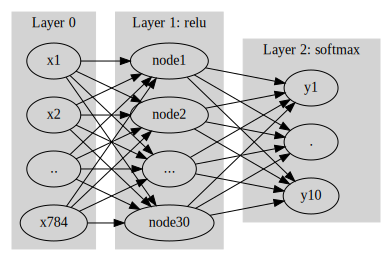

In [ ]:
#collapse
gv('''
splines=line
subgraph cluster_1{
    style=filled;
    color=lightgrey;
    "x1"
    "x2"
    ".."
    "x784"
    label = "Layer 0"
}
subgraph cluster_2{
    style=filled;
    color=lightgrey;
    "x1" -> "node1"
    "x2" -> "node1"
    ".." -> "node1"
    
    "x784" -> "node1"
    "x1" -> "node2"
    "x2" -> "node2"
    ".." -> "node2"
    "x784" -> "node2"
    
    "x1" -> "..."
    "x2" -> "..."
    ".." -> "..."
    "x784" -> "..."

    "x1" -> "node30"
    "x2" -> "node30"
    ".." -> "node30"
    "x784" -> "node30"


    label = "Layer 1: relu"
}
subgraph cluster_3{
    style=filled;
    color=lightgrey;

    "node1" -> "y10"
    "node2" -> "y10"
    "..." -> "y10"
    "node30" -> "y10"
    
    "node1" -> "y1"
    "node2" -> "y1"
    "..." -> "y1"
    "node30" -> "y1"
    
    "node1" -> "."
    "node2" -> "."
    "..." -> "."
    "node30" -> "."
    
    label = "Layer 2: softmax"
}
''')

y는 10차원이 되겠지, [] 안에 있는 수만큼

Fashion_MNIST 다중분류

`-` 데이터정리

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [5]:
tf.keras.utils.to_categorical(y_train)

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
X=x_train.reshape(-1,784) # 60000 by 784
y=tf.keras.utils.to_categorical(y_train) # 위처럼 10을 정렬하여 1 또는 0으로 
XX=x_test.reshape(-1,784)
yy=tf.keras.utils.to_categorical(y_test)

In [15]:
#collapse_output
tf.random.set_seed(43052)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(30,activation='relu')) # 따로 써도 되고 같이 써도 되는 활성화함수
net.add(tf.keras.layers.Dense(10,activation='softmax')) # y가 10이니까
net.compile(optimizer='adam',loss=tf.losses.categorical_crossentropy,metrics=['accuracy'])
net.fit(X,y,epochs=20,batch_size=1200)

Epoch 1/20
50/50 [==============================] - 0s 3ms/step - loss: 32.5672 - accuracy: 0.3730
Epoch 2/20
50/50 [==============================] - 0s 3ms/step - loss: 2.4414 - accuracy: 0.3877
Epoch 3/20
50/50 [==============================] - 0s 3ms/step - loss: 1.9154 - accuracy: 0.3809
Epoch 4/20
50/50 [==============================] - 0s 3ms/step - loss: 1.7740 - accuracy: 0.4041
Epoch 5/20
50/50 [==============================] - 0s 3ms/step - loss: 1.6474 - accuracy: 0.4517
Epoch 6/20
50/50 [==============================] - 0s 3ms/step - loss: 1.5429 - accuracy: 0.4842
Epoch 7/20
50/50 [==============================] - 0s 3ms/step - loss: 1.4649 - accuracy: 0.4992
Epoch 8/20
50/50 [==============================] - 0s 3ms/step - loss: 1.4001 - accuracy: 0.5227
Epoch 9/20
50/50 [==============================] - 0s 3ms/step - loss: 1.3400 - accuracy: 0.5461
Epoch 10/20
50/50 [==============================] - 0s 3ms/step - loss: 1.2882 - accuracy: 0.5539
Epoch 11/20
50/50 

In [16]:
net.evaluate(XX,yy)

313/313 [==============================] - 1s 3ms/step - loss: 1.0963 - accuracy: 0.5930


[1.0962964296340942, 0.5929999947547913]

In [17]:
net.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 30)                23550     
                                                                 
 dense_11 (Dense)            (None, 10)                310       
                                                                 
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________


`-` 시도2: 더 깊은 신경망 

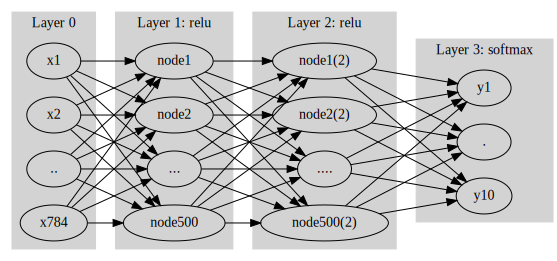

In [ ]:
#collapse
gv('''
splines=line
subgraph cluster_1{
    style=filled;
    color=lightgrey;
    "x1"
    "x2"
    ".."
    "x784"
    label = "Layer 0"
}
subgraph cluster_2{
    style=filled;
    color=lightgrey;
    "x1" -> "node1"
    "x2" -> "node1"
    ".." -> "node1"
    
    "x784" -> "node1"
    "x1" -> "node2"
    "x2" -> "node2"
    ".." -> "node2"
    "x784" -> "node2"
    
    "x1" -> "..."
    "x2" -> "..."
    ".." -> "..."
    "x784" -> "..."

    "x1" -> "node500"
    "x2" -> "node500"
    ".." -> "node500"
    "x784" -> "node500"


    label = "Layer 1: relu"
}

subgraph cluster_3{
    style=filled;
    color=lightgrey;

    "node1" -> "node1(2)"
    "node2" -> "node1(2)"
    "..." -> "node1(2)"
    "node500" -> "node1(2)"

    "node1" -> "node2(2)"
    "node2" -> "node2(2)"
    "..." -> "node2(2)"
    "node500" -> "node2(2)"
    
    "node1" -> "...."
    "node2" -> "...."
    "..." -> "...."
    "node500" -> "...."
    
    "node1" -> "node500(2)"
    "node2" -> "node500(2)"
    "..." -> "node500(2)"
    "node500" -> "node500(2)"

    
    label = "Layer 2: relu"
}

subgraph cluster_4{
    style=filled;
    color=lightgrey;

    "node1(2)" -> "y10"
    "node2(2)" -> "y10"
    "...." -> "y10"
    "node500(2)" -> "y10"
    
    "node1(2)" -> "y1"
    "node2(2)" -> "y1"
    "...." -> "y1"
    "node500(2)" -> "y1"
    
    "node1(2)" -> "."
    "node2(2)" -> "."
    "...." -> "."
    "node500(2)" -> "."
    
    label = "Layer 3: softmax"
}
''')

In [19]:
#collapse_output
tf.random.set_seed(43052)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(500,activation='relu'))
net.add(tf.keras.layers.Dense(500,activation='relu'))
net.add(tf.keras.layers.Dense(10,activation='softmax'))
net.compile(optimizer='adam',loss=tf.losses.categorical_crossentropy,metrics=['accuracy'])
net.fit(X,y,epochs=50,batch_size=1200)

Epoch 1/50
50/50 [==============================] - 0s 3ms/step - loss: 21.6114 - accuracy: 0.6873
Epoch 2/50
50/50 [==============================] - 0s 4ms/step - loss: 1.9454 - accuracy: 0.8038
Epoch 3/50
50/50 [==============================] - 0s 4ms/step - loss: 1.2467 - accuracy: 0.8200
Epoch 4/50
50/50 [==============================] - 0s 4ms/step - loss: 0.9279 - accuracy: 0.8338
Epoch 5/50
50/50 [==============================] - 0s 4ms/step - loss: 0.7468 - accuracy: 0.8440
Epoch 6/50
50/50 [==============================] - 0s 4ms/step - loss: 0.6406 - accuracy: 0.8524
Epoch 7/50
50/50 [==============================] - 0s 4ms/step - loss: 0.5412 - accuracy: 0.8641
Epoch 8/50
50/50 [==============================] - 0s 4ms/step - loss: 0.4863 - accuracy: 0.8701
Epoch 9/50
50/50 [==============================] - 0s 4ms/step - loss: 0.4325 - accuracy: 0.8758
Epoch 10/50
50/50 [==============================] - 0s 4ms/step - loss: 0.3925 - accuracy: 0.8847
Epoch 11/50
50/50 

In [20]:
net.evaluate(XX,yy)

313/313 [==============================] - 1s 3ms/step - loss: 0.7063 - accuracy: 0.8620


[0.706275999546051, 0.8619999885559082]

In [21]:
net.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 500)               392500    
                                                                 
 dense_13 (Dense)            (None, 500)               250500    
                                                                 
 dense_14 (Dense)            (None, 10)                5010      
                                                                 
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________


훨씬 파라미터를 많이 썼네!

### 숙제 

`-` 시도1,2에서 사용된 모형에서 각각 추정해야할 파라메터의 수를 구하고 비교하라. 

**hint: `net.summary()` 이용**

시도 1

In [17]:
net.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 30)                23550     
                                                                 
 dense_11 (Dense)            (None, 10)                310       
                                                                 
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________


In [16]:
net.evaluate(XX,yy)

313/313 [==============================] - 1s 3ms/step - loss: 1.0963 - accuracy: 0.5930


[1.0962964296340942, 0.5929999947547913]

시도 2

In [21]:
net.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 500)               392500    
                                                                 
 dense_13 (Dense)            (None, 500)               250500    
                                                                 
 dense_14 (Dense)            (None, 10)                5010      
                                                                 
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________


In [20]:
net.evaluate(XX,yy)

313/313 [==============================] - 1s 3ms/step - loss: 0.7063 - accuracy: 0.8620


[0.706275999546051, 0.8619999885559082]

- 시도 2가 사용한 파라메터의 수가 더 많다.
- 정확도는 시도 2가 더 높았다.

## 평가지표

### 다양한 평가지표들 

`-` 의문: 왜 다양한 평가지표가 필요한가? (accuray면 끝나는거 아닌가? 더 이상 뭐가 필요해?)

`-` 여러가지 평가지표들: https://en.wikipedia.org/wiki/Positive_and_negative_predictive_values
- 이걸 다 암기하는건 불가능함. 
- 몇 개만 뽑아서 암기하고 왜 쓰는지만 생각해보고 넘어가자!

### confusion matrix의 이해 

`-` 표1

| |퇴사(예측)|안나감(예측)|
|:-:|:-:|:-:|
|퇴사(실제)|TP|FN|
|안나감(실제)| FP| TN|

True/Positive/False/Negative

`-` 표2 (책에없음) 

| |퇴사(예측)|안나감(예측)|
|:-:|:-:|:-:|
|퇴사(실제)|$(y,\hat{y})= $ (O,O)|$(y,\hat{y})= $(O,X)|
|안나감(실제)| $(y,\hat{y})= $(X,O)| $(y,\hat{y})= $(X,X)|

`-` 표3 (책에없음) 

| |퇴사(예측)|안나감(예측)|
|:-:|:-:|:-:|
|퇴사(실제)|TP, $\# O/O$ |FN, $\#O/X$|
|안나감(실제)| FP, $\#X/O$| TN, $\#X/X$|

- 암기법, (1) 두번째 글자를 그대로 쓴다 (2) 첫글자가 T이면 분류를 제대로한것, 첫글자가 F이면 분류를 잘못한것

`-` 표4 (위키등에 있음) 

| |퇴사(예측)|안나감(예측)| |
|:-:|:-:|:-:|:-:|
|퇴사(실제)| TP, $\# O/O$ |FN, $\# O/X$| Sensitivity(민감도)=Recall(재현율)=$\frac{TP}{TP+FN}$=$\frac{\#O/O}{\# O/O+ \#O/X}$|
|안나감(실제)| FP, $\# X/O$| TN, $\# X/X$| |
| |Precision(프리시즌)=$\frac{TP}{TP+FP}$=$\frac{\# O/O}{\# O/O+\# X/O}$| |Accuracy(애큐러시)=$\frac{TP+TN}{total}$=$\frac{\#O/O+\# X/X}{total}$|

### 상황극 

`-` 최규빈은 입사하여 "퇴사자 예측시스템"의 개발에 들어갔다. 

`-` 자료의 특성상 대부분의 사람이 퇴사하지 않고 회사에 잘 다닌다. 즉 1000명이 있으면 10명정도 퇴사한다. 

### Accuracy

`-` 정의: Accuracy(애큐러시)=$\frac{TP+TN}{total}$=$\frac{\#O/O+ \#X/X}{total}$
- 한국말로는 정확도, 정분류율이라고 한다. 
- 한국말이 헷갈리므로 그냥 영어를 외우는게 좋다. (어차피 Keras에서 옵션도 영어로 넣음) 

`-` (상확극 시점1) 왜 애큐러시는 불충분한가?
- 회사: 퇴사자예측프로그램 개발해
- 최규빈: 귀찮은데 다 안 나간다고 하자! -> 99퍼의 accuracy 

> 모델에 사용한 파라메터 = 0. 그런데 애큐러시 = 99! 이거 엄청 좋은 모형이다? 


예측이 아니라.. 예상으로 그칠 듯, 결과와 비교하면? 맞지도 않을걸

### Sensitivity(민감도), Recall(재현율), True Positive Rate(TPR)

`-` 정의: Sensitivity(민감도)=Recall(재현율)=$\frac{TP}{TP+FN}$=$\frac{\# O/O}{\# O/O+\# O/X}$
- 분모: 실제 O인 관측치 수 
- 분자: 실제 O를 O라고 예측한 관측치 수 
- 뜻: 실제 O를 O라고 예측한 비율

`-` (상황극 시점2) recall을 봐야하는 이유
- 인사팀: 실제 퇴사자를 퇴사자로 예측해야 의미가 있음! 우리는 퇴사할것 같은 10명을 찍어달란 의미였어요! (그래야 면담을 하든 할거아냐!) 
- 최규빈: 가볍고(=파라메터 적고) 잘 맞추는 모형 만들어 달라면서요?


- 인사팀: (고민중..) 사실 생각해보니까 이 경우는 애큐러시는 의미가 없네. 실제 나간 사람 중 최규빈이 나간다고 한 사람이 몇인지 카운트 하는게 더 의미가 있겠다. 우리는 앞으로 리컬(혹은 민감도)를 보겠다! 

> 예시1: 실제로 퇴사한 10명중 최규빈이 나간다고 찍은 사람이 5명이면 리컬이 50% 

> 예시2: 최규빈이 아무도 나가지 않는다고 예측해버린다? 실제 10명중에서 최규빈이 나간다고 적중시킨사람은 0명이므로 이 경우 리컬은 0%

- 결론: 우리가 필요한건 recall이니까 앞으로 recall을 가져와! accuracy는 큰 의미없어. (그래도 명색이 모델인데 accuracy가 90은 되면 좋겠다)

### Precision

`-` 정의: Precision(프리시즌)=$\frac{TP}{TP+FP}$=$\frac{\# O/O}{\# O/O+\# X/O}$
- 분모: O라고 예측한 관측치
- 분자: O라고 예측한 관측치중 진짜 O인 관측치 
- 뜻: O라고 예측한 관측치중 진짜 O인 비율

`-` (상황극 시점3) recall 만으로 불충분한 이유

- 최규빈: 에휴.. 귀찮은데 그냥 좀만 수틀리면 다 나갈것 같다고 해야겠다. -> 한 100명 나간다고 했음 -> 실제로 최규빈이 찍은 100명중에 10명이 다 나감!
    - 0.1만 넘어도 나간다고 해버리면?

> 이 경우 애큐러시는 91%, 리컬은 100% (퇴사자 10명을 일단은 다 맞췄으므로). 

- 인사팀: (화가 많이 남) 멀쩡한 사람까지 다 퇴사할 것 같다고 하면 어떡해요? 최규빈 연구원이 나간다고 한 100명중에 실제로 10명만 나갔어요. 

- 인사팀: 마치 총으로 과녁중앙에 맞춰 달라고 했더니 기관총을 가져와서 한번 긁은것이랑 뭐가 달라요? 맞추는게 문제가 아니고 precision이 너무 낮아요. 

- 최규빈: accuracy 90% 이상, recall은 높을수록 좋다는게 주문 아니었나요? 

- 인사팀: (고민중..) 앞으로는 recall과 함께 precision도 같이 제출하세요. precision은 당신이 나간다고 한 사람중에 실제 나간사람의 비율을 의미해요. 이 경우는 $\frac{10}{100}$이니까 precision이 10%입니다. (속마음: recall 올리겠다고 무작정 너무 많이 예측하지 말란 말이야!) 

### F1 score 

`-` 정의: recall과 precision의 조화평균 

`-` (상황극 시점4) recall, precision을 모두 고려 

- 최규빈: recall/precision을 같이 내는건 좋은데요, 둘은 trade off의 관계에 있습니다. 물론 둘다 올리는 모형이 있다면 좋지만 그게 쉽지는 않아요. 보통은 precision을 올리려면 recall이 희생되는 면이 있고요, recall을 올리려고 하면 precision이 다소 떨어집니다. 

- 최규빈: 평가기준이 애매하다는 의미입니다. 모형1,2가 있는데 모형1은 모형2보다 precision이 약간 좋고 대신 recall이 떨어진다면 모형1이 좋은것입니까? 아니면 모형2가 좋은것입니까? 

- 인사팀: 그렇다면 둘을 평균내서 F1score를 계산해서 제출해주세요. 

### Specificity(특이도), False Positive Rate(FPR) 

`-` 정의: 

(1) Specificity(특이도)=$\frac{TN}{FP+TN}$=$\frac{\# X/X}{\# X/O+\# X/X}$

(2) False Positive Rate (FPR) = 1-Specificity(특이도) = $\frac{FP}{FP+TN}$=$\frac{\# X/O}{\# X/O+\# X/X}$

`-` 의미: **FPR = 오해해서 미안해, recall(=TPR)을 올리려고 보니 어쩔 수 없었어 ㅠㅠ**
- specificity는 안나간 사람을 안나갔다고 찾아낸 비율인데 별로 안중요하다. 
- FPR은 recall을 올리기 위해서 "실제로는 회사 잘 다니고 있는 사람 중 최규빈이 나갈것 같다고 찍은 사람들" 의 비율이다. 

> 즉 생사람잡은 비율.. 오해해서 미안한 사람의 비율.. (recall 올리다가 희생된 사람)

### ROC curve 

`-` 정의: $x$축=FPR, $y$축=TPR 을 그린 커브 

`-` 의미: 
- 결국 "오해해서 미안해 vs recall"을 그린 곡선이 ROC커브이다. 
- 생각해보면 오해하는 사람이 많을수록 당연히 recall은 올라간다. 따라서 우상향하는 곡선이다. 
- 오해한 사람이 매우 적은데 recall이 우수하면 매우 좋은 모형이다. 그래서 초반부터 ROC값이 급격하게 올라가면 좋은 모형이다. 

![](https://raw.githubusercontent.com/angeloyeo/angeloyeo.github.io/master/pics/2020-08-05-ROC/pic1.png)

### fashion_mnist (revisit)

In [22]:
import tensorflow as tf 
import tensorflow.experimental.numpy as tnp

In [23]:
tnp.experimental_enable_numpy_behavior()

In [24]:
import matplotlib.pyplot as plt

`-` fashion mnist data 다시 불러오자

In [25]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [26]:
x_train.shape

(60000, 28, 28)

- 이미지는 원래 가로픽셀 세로픽셀 3 이어야 한다. (색을 표현하는 basis는 빨,녹,파)

`-`- 따라서 이미지의 차원이 단지 (28,28)이라는 것은 흑백이미지라는 뜻이다.

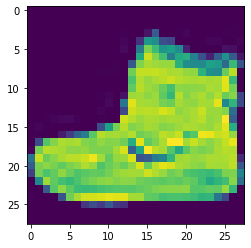

In [27]:
plt.imshow(x_train[0]) 

- 아닌데요?! 칼라인데요?! -> 흑백이다. 그냥 밝을수록 노란색, 어두울수록 남색으로 표현한것 뿐임 (colormap이 viridis일 뿐임)

`-` 일반적으로 분석할 이미지는 칼라를 의미하는 채널도 포함할테니 아래와 같이 자료형을 정리하는게 일반적으로 이미지 자료를 분석하는 정석적인 처리방법이다.

In [29]:
X = tf.constant(x_train.reshape(-1,28,28,1),dtype=tf.float64)
y = tf.keras.utils.to_categorical(y_train)
XX = tf.constant(x_test.reshape(-1,28,28,1),dtype=tf.float64)
yy = tf.keras.utils.to_categorical(y_test)

In [30]:
X.shape, XX.shape

(TensorShape([60000, 28, 28, 1]), TensorShape([10000, 28, 28, 1]))

- keras에서 이미지자료는 (관측치수,픽셀,픽셀,채널)과 같은 형식을 가진다.
- 예를들어 256*256 size인 칼라이미지(채널수=3)가 10개 있다면 X.shape은 (10,256,256,3)이다.

### X의 차원이 (관측치수,픽셀,픽셀,채널)일 경우 DNN 쓰기